In [12]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
rdkit.__version__

'2023.09.6'

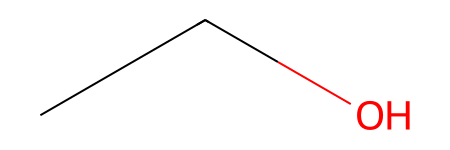

In [13]:
smiles = "CCO"

molecule = Chem.MolFromSmiles(smiles)
molecule

In [14]:
# First, make sure you have the RDKit library installed.
# You can install it using pip: `pip install rdkit-pypi`

from rdkit import Chem
from rdkit.Chem import Draw

# Define your molecule's SMILES string
smiles = 'Cc1ccccc1'  # Example SMILES for toluene

# Create an RDKit molecule object from the SMILES
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully created
if mol is not None:
    # Generate a 2D depiction of the molecule
    img = Draw.MolToImage(mol)

    # Display the image (you can save it to a file if needed)
    img.show()
else:
    print("Error: Unable to create molecule from SMILES.")


In [15]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Draw

def get_smiles_from_name(common_name):
    try:
        compounds = pcp.get_compounds(common_name, 'name')
        return compounds[0].isomeric_smiles
    except IndexError:
        return None

def is_valid_molecule(molecule_name):
    smiles = get_smiles_from_name(molecule_name) if not Chem.MolFromSmiles(molecule_name) else molecule_name
    molecule = Chem.MolFromSmiles(smiles)
    return molecule is not None

def visualize_molecule(molecule_name):
    smiles = get_smiles_from_name(molecule_name) if not Chem.MolFromSmiles(molecule_name) else molecule_name
    molecule = Chem.MolFromSmiles(smiles)
    if molecule:
        # Generate a 2D structure for the molecule
        Chem.rdDepictor.Compute2DCoords(molecule)
        # Draw the molecule
        img = Draw.MolToImage(molecule)
        return img
    else:
        print(f"The molecule name '{molecule_name}' is not valid.")
        return None

# Example usage:
common_name = "ethanol"
img = visualize_molecule(common_name)
img.show() if img else None


[15:09:42] SMILES Parse Error: syntax error while parsing: ethanol
[15:09:42] SMILES Parse Error: Failed parsing SMILES 'ethanol' for input: 'ethanol'


In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from pyscf import gto, symm

def get_point_group_from_smiles(smiles):
    # Create a molecule object from SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens
    molecule = Chem.AddHs(molecule)

    # Generate 3D coordinates
    AllChem.EmbedMolecule(molecule)
    AllChem.UFFOptimizeMolecule(molecule)

    # Get atomic coordinates in the format required by PySCF
    conf = molecule.GetConformer()
    atom_coords = ''
    for atom in molecule.GetAtoms():
        pos = conf.GetAtomPosition(atom.GetIdx())
        atom_coords += f"{atom.GetSymbol()} {pos.x} {pos.y} {pos.z};"

    # Define the molecule in PySCF
    mol = gto.M(atom=atom_coords)

    # Detect and print the point group
    mol.build()
    point_group_info = symm.detect_symm(mol)
    point_group = point_group_info[0][0]  # Access the first element of the list
    return point_group

# Example usage:
smiles_string = 'CCO'  # Replace with your molecule's SMILES string
point_group = get_point_group_from_smiles(smiles_string)
print(f'The point group of the molecule is: {point_group}')


TypeError: object of type 'Mole' has no len()